In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf


In [2]:
data = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/project.csv')

In [3]:
전출지 = data[data['전출지'] == '_강서구(서울)'].T
전입지 = data[data['전입지'] == '_강서구(서울)'].T

In [4]:
전출지 = 전출지.reset_index()
전출지.iloc[1:, :]
전출지 = 전출지.rename(columns = {'index' : 'year', 375: '종로구' , 376 : '중구', 377 : '용산구', 378 : '성동구', 379 : '광진구', 380 : '동대문구', 381 : '중랑구', 382 : '성북구',
                      383 : '강북구', 384 : '도봉구', 385 : '노원구', 386:'은평구', 387:'서대문구', 388:'마포구', 389:'양천구', 390:'강서구', 391:'구로구', 392:'금천구',
                      393:'영등포구', 394:'동작구', 395:'관악구', 396 : '서초구', 397 : '강남구', 398 :'송파구', 399 : '강동구'})
전입지 = 전입지.reset_index()
전입지.iloc[1:, :]
전입지 = 전입지.rename(columns = {'index' : 'year', 15: '전입_종로구' , 40 : '전입_중구', 65 : '전입_용산구', 90 : '전입_성동구', 115 : '전입_광진구', 140 : '전입_동대문구', 165 : '전입_중랑구', 190 : '전입_성북구',
                      215 : '전입_강북구', 240 : '전입_도봉구', 265 : '전입_노원구', 290:'전입_은평구', 315:'전입_서대문구', 340:'전입_마포구', 365:'전입_양천구', 390:'전입_강서구', 415:'전입_구로구', 440:'전입_금천구',
                      465:'전입_영등포구', 490:'전입_동작구', 515:'전입_관악구', 540 : '전입_서초구', 565 : '전입_강남구', 590 :'전입_송파구', 615 : '전입_강동구'})
전입지 = 전입지.drop([0,1], axis = 0)
전출지 = 전출지.drop([0,1],axis = 0)

In [5]:
# 전입지와 전출지 dataframe
print(전입지.shape, 전출지.shape)

(22, 26) (22, 26)


In [6]:
column = 전출지.iloc[:,1:].columns
for i in column:
  전출지[i] = 전출지[i].apply(lambda x:x.replace(',',''))
  전출지[i] = 전출지[i].astype('int')
  전출지[i] = 전출지[i].apply(lambda x:-1*x)

column = 전입지.iloc[:,1:].columns
for i in column:
  전입지[i] = 전입지[i].apply(lambda x:x.replace(',',''))
  전입지[i] = 전입지[i].astype('int')

전입지 = 전입지.drop('year', axis = 1)

# EDA

In [7]:
data = pd.concat([전출지,전입지], axis = 1)

Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object')


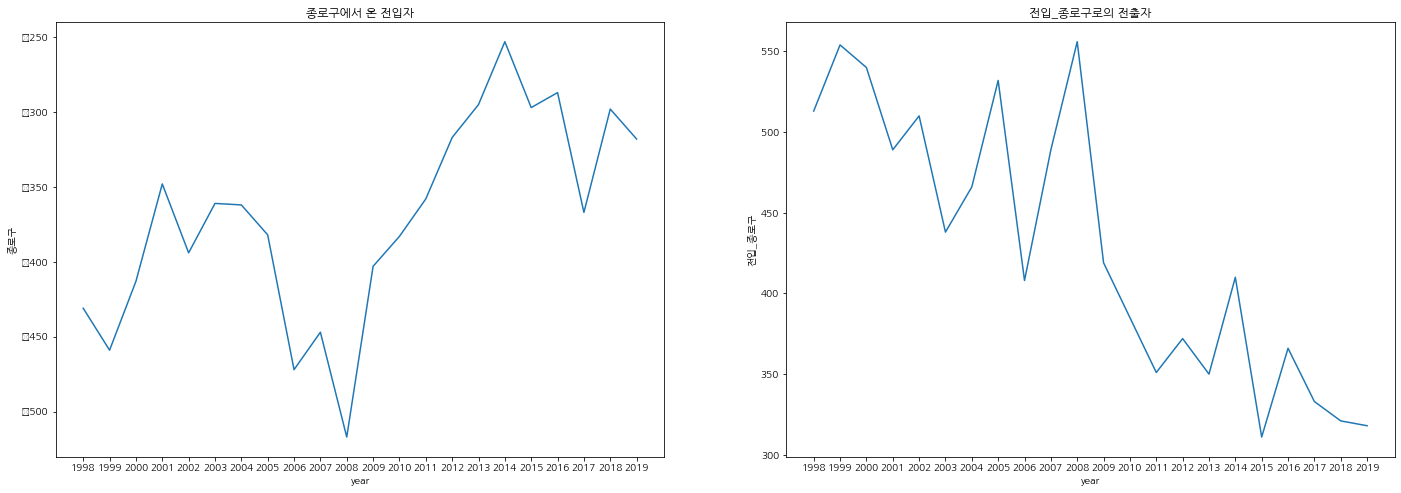

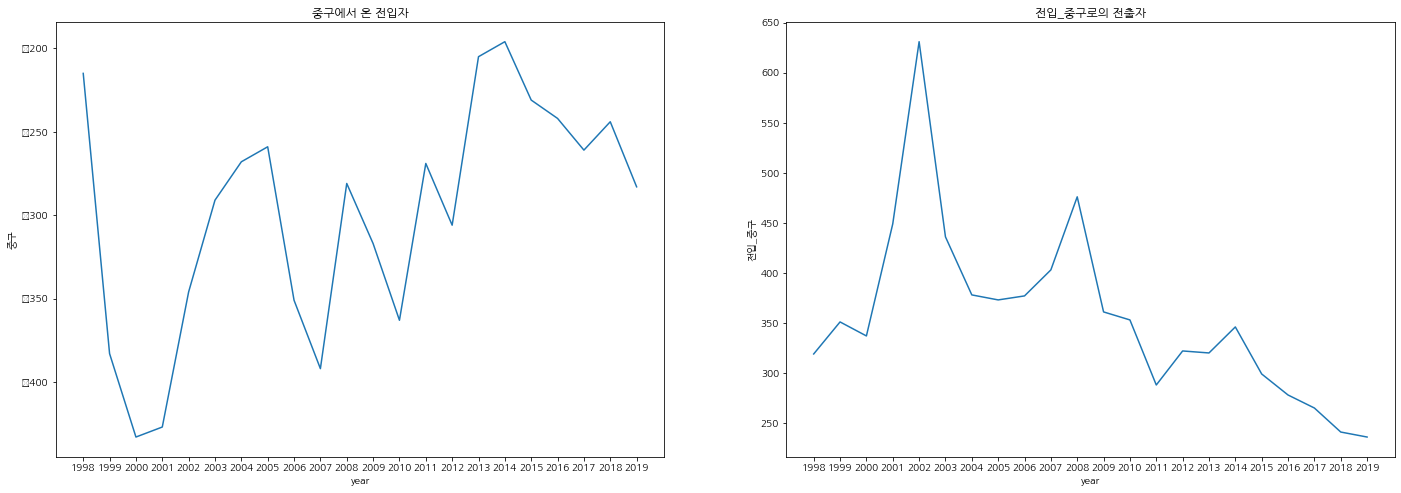

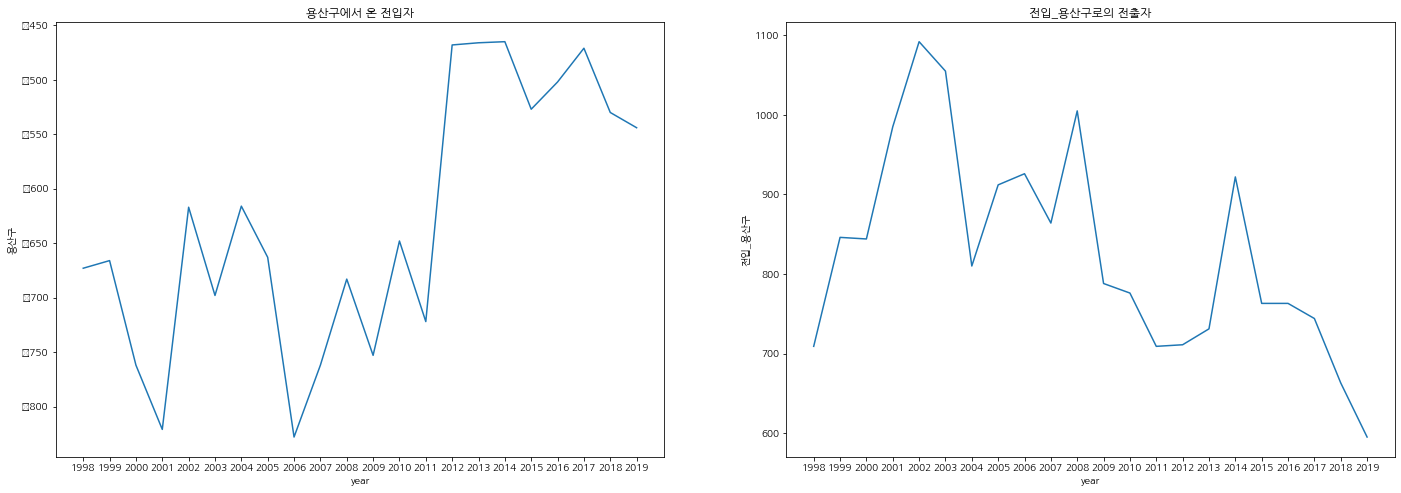

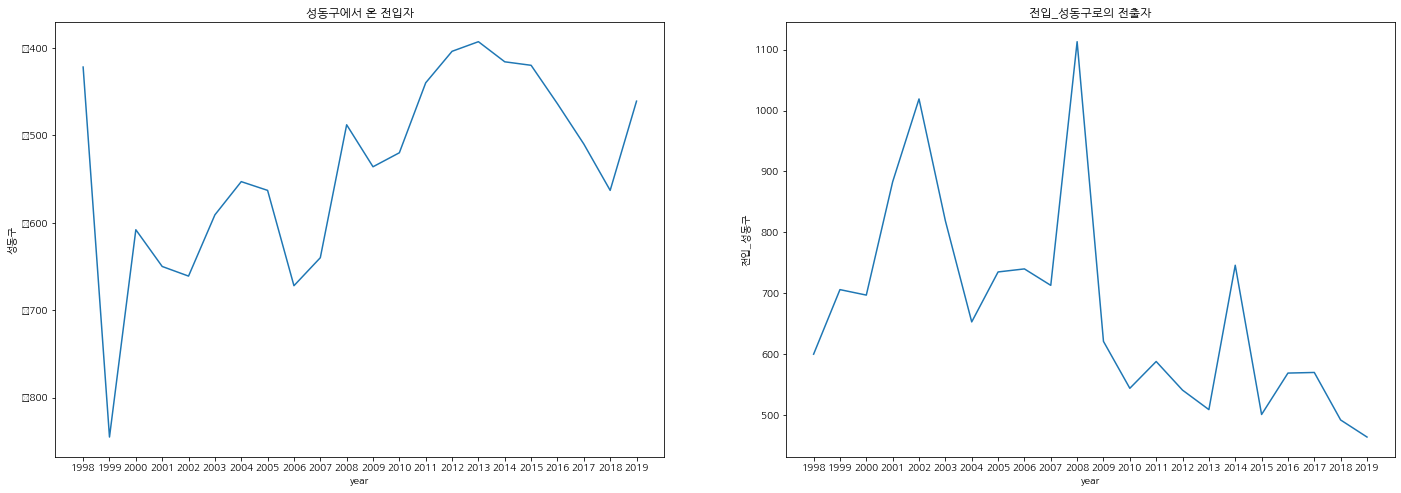

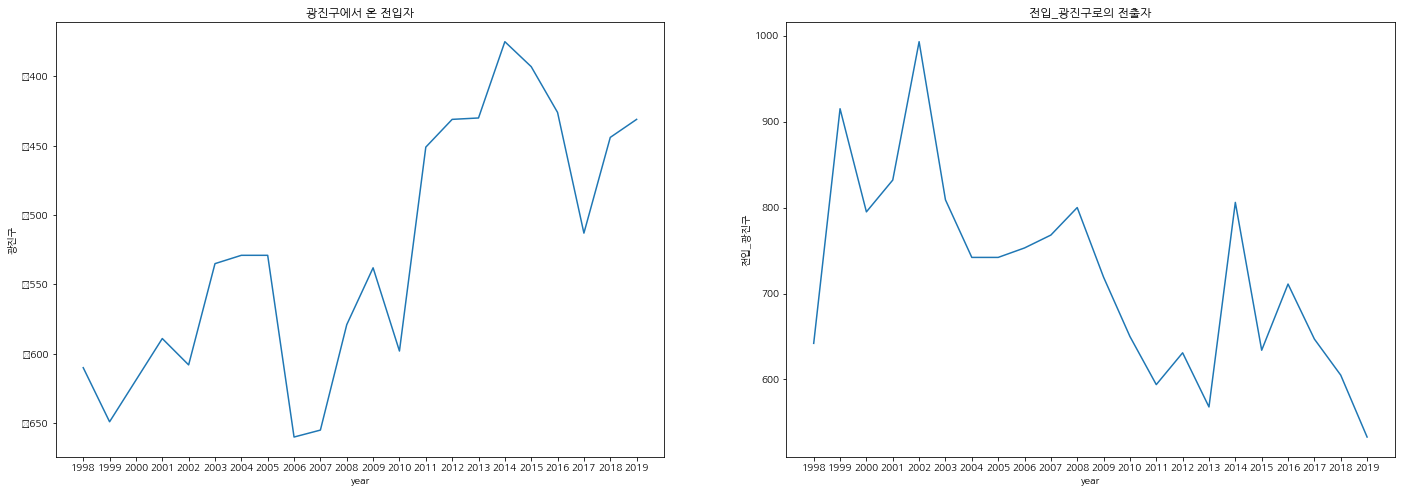

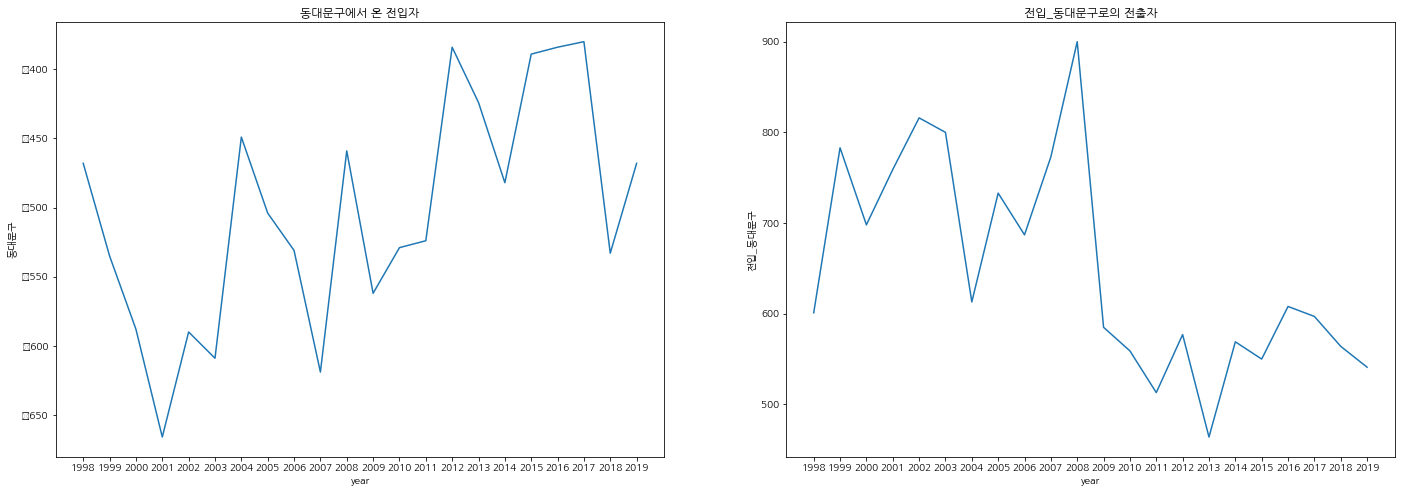

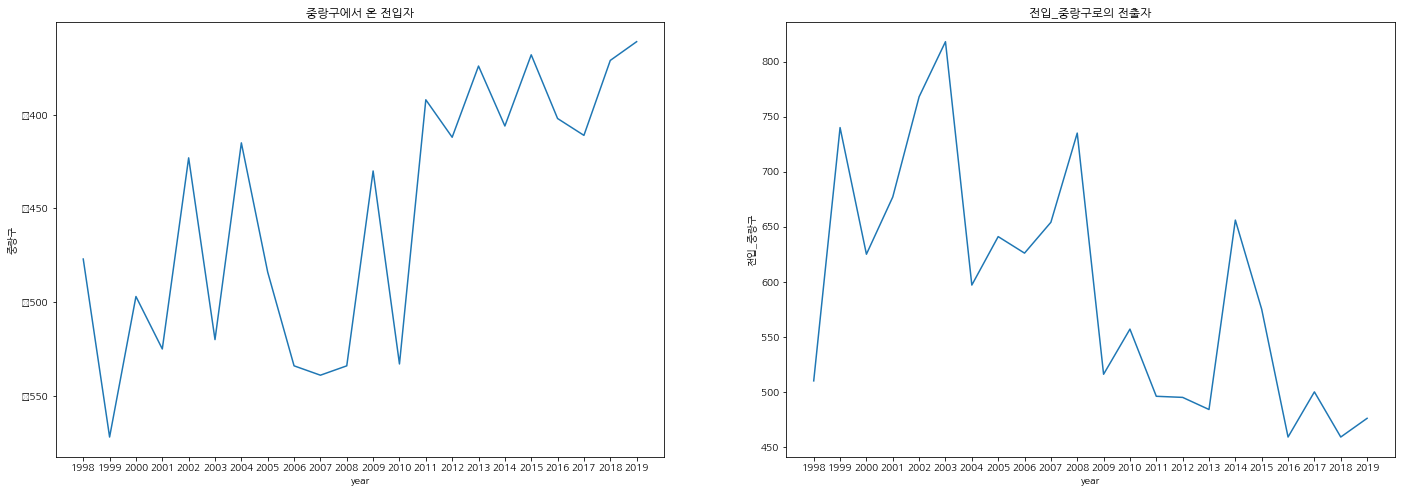

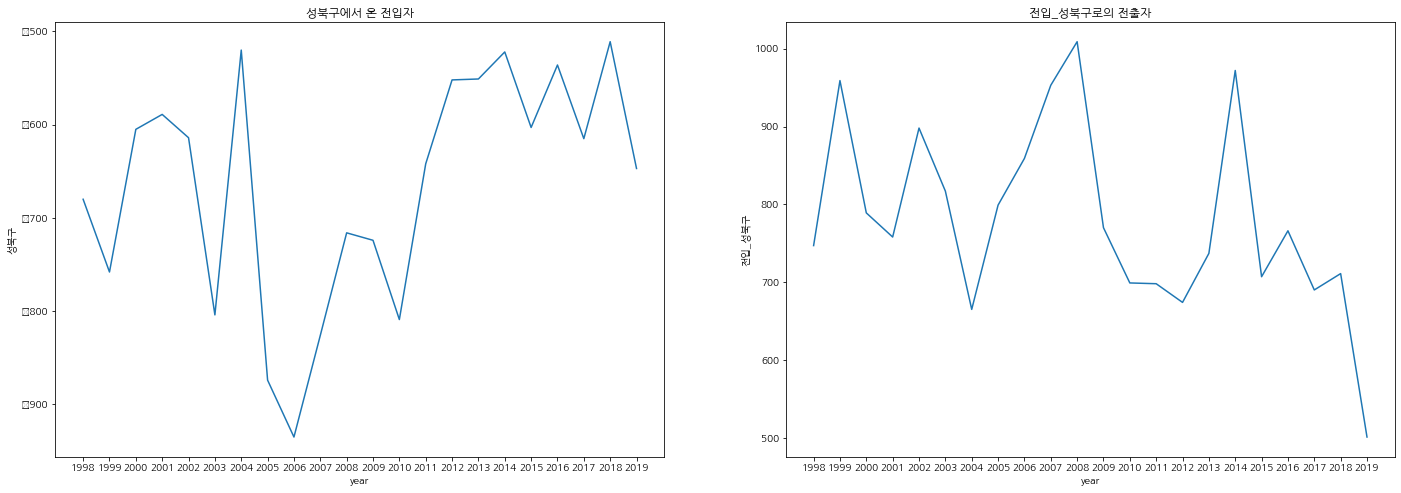

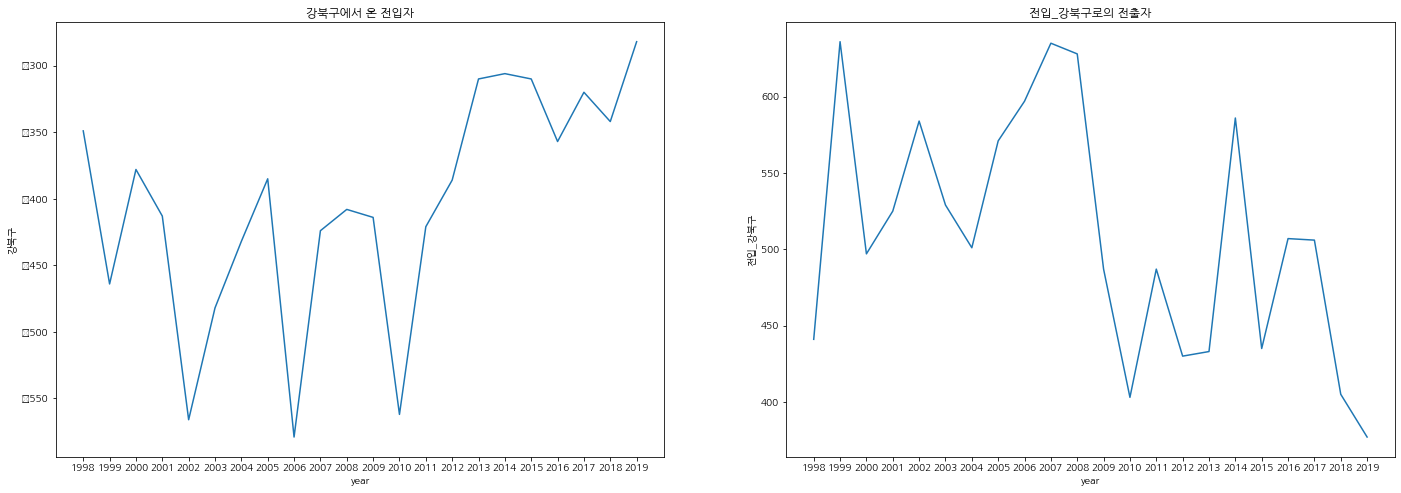

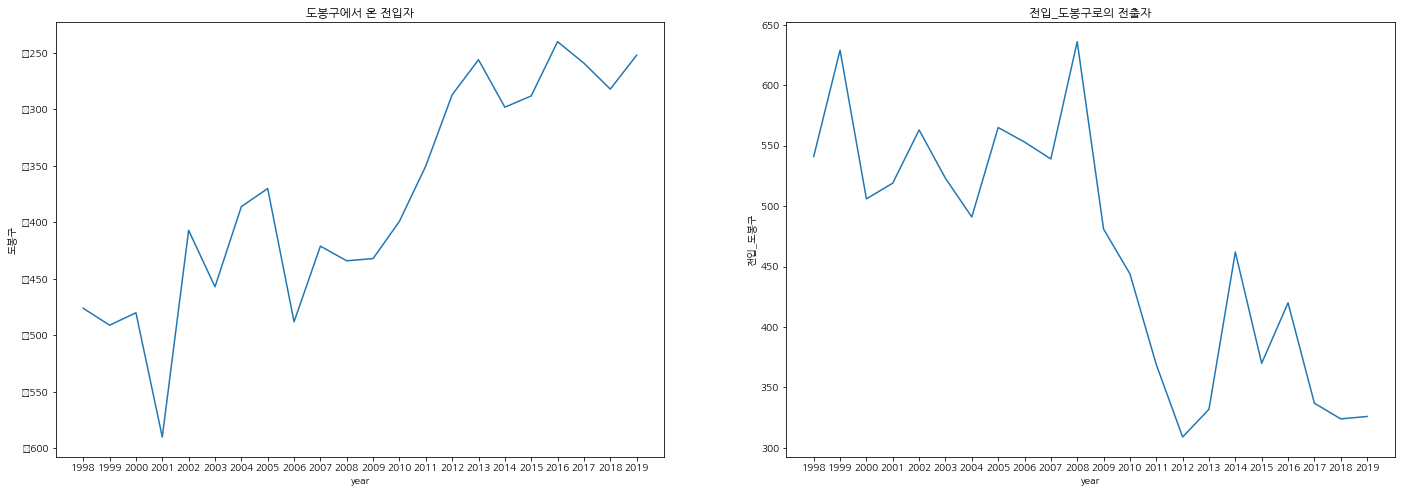

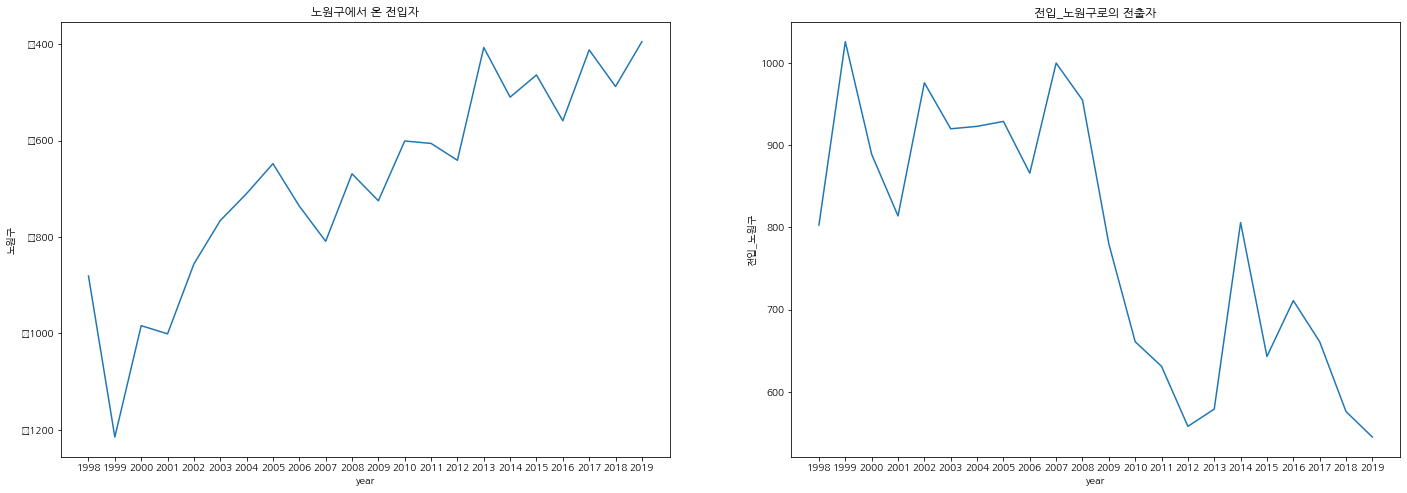

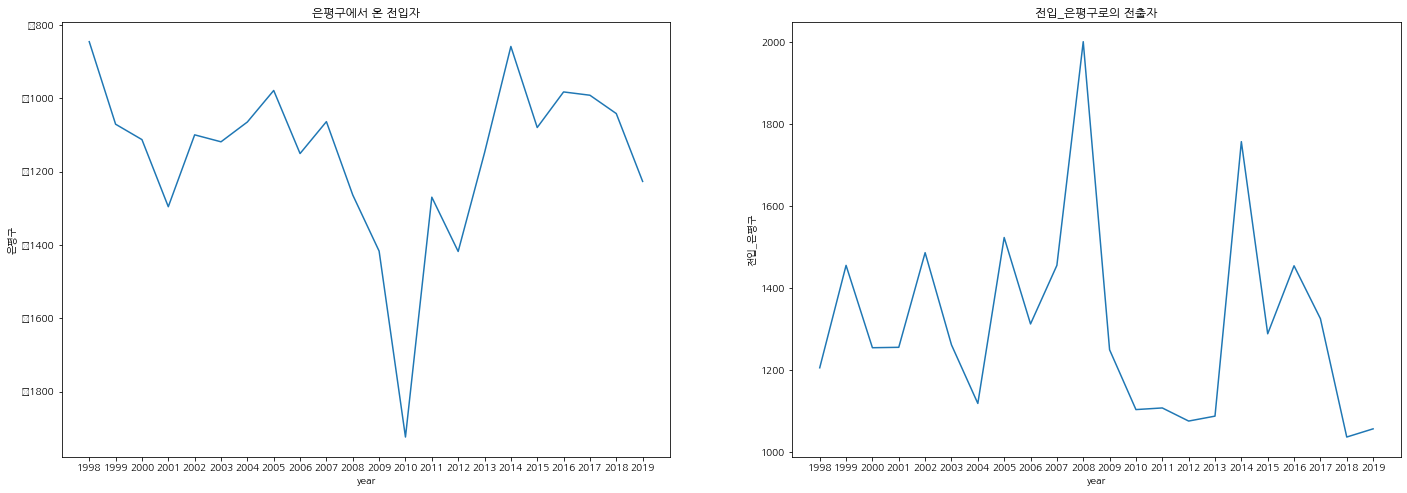

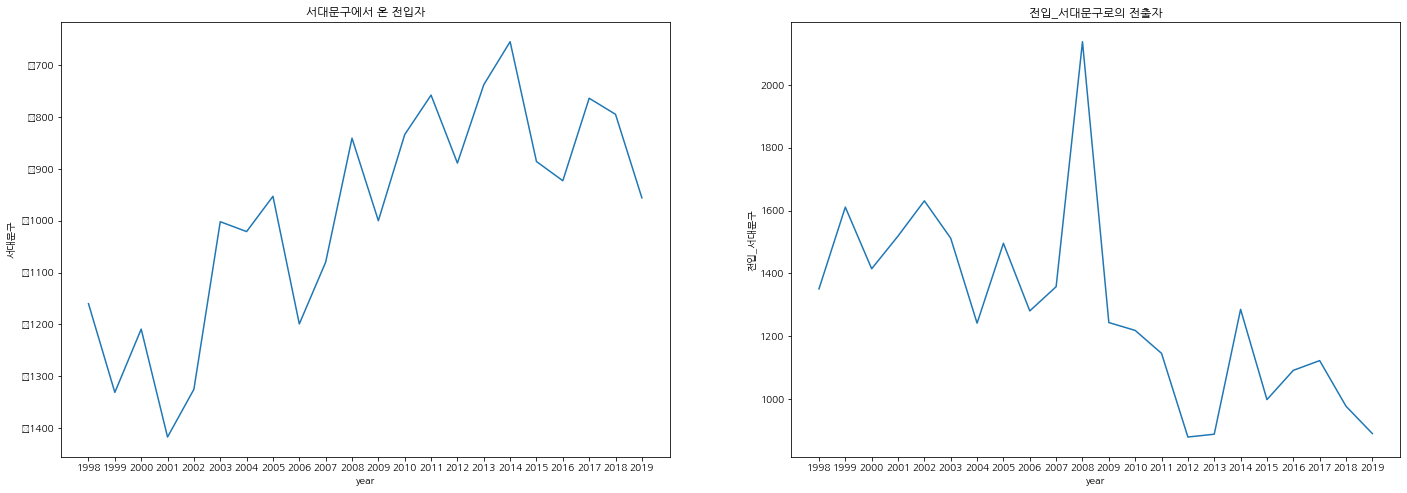

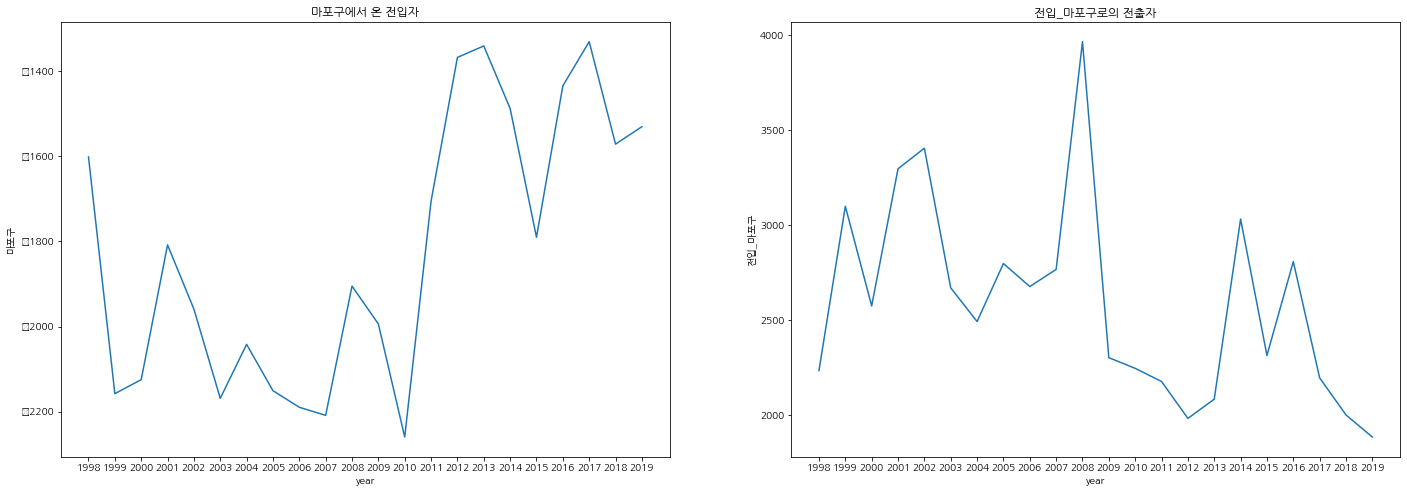

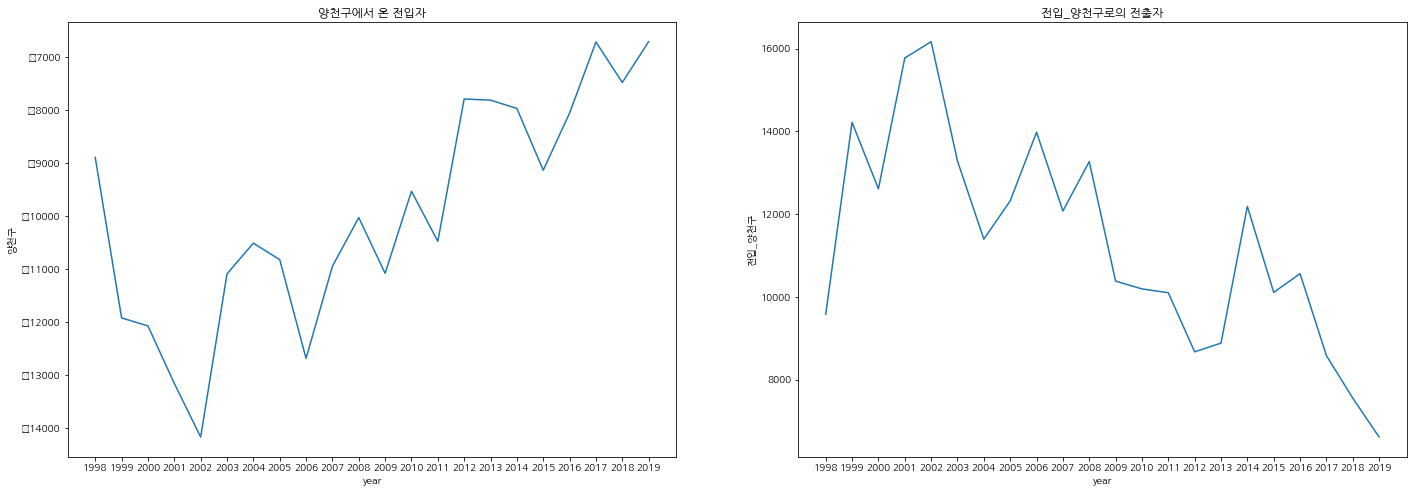

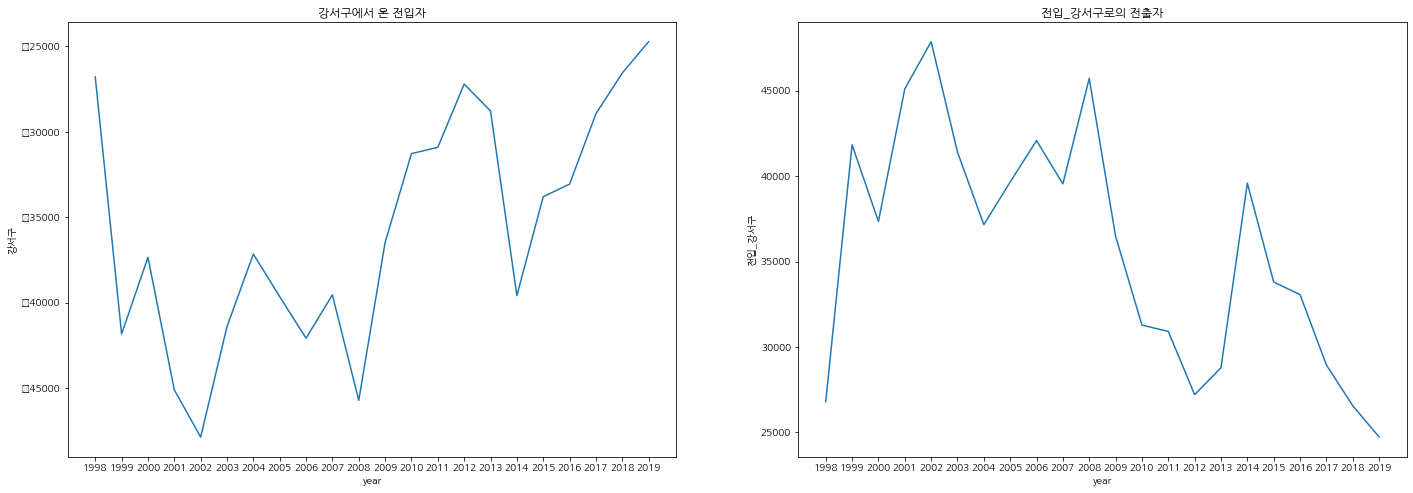

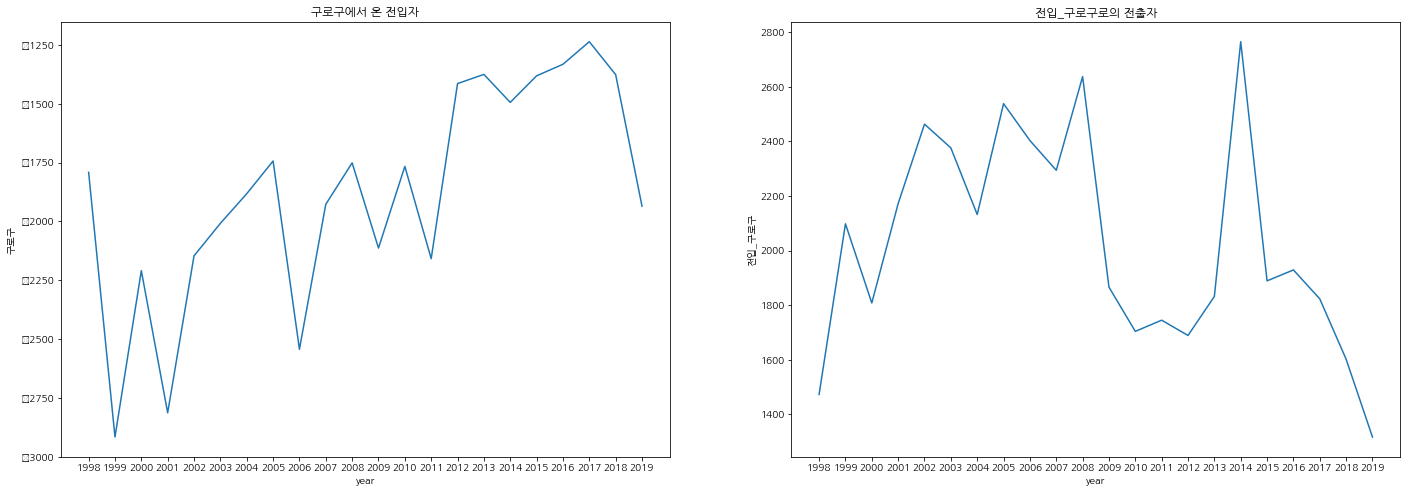

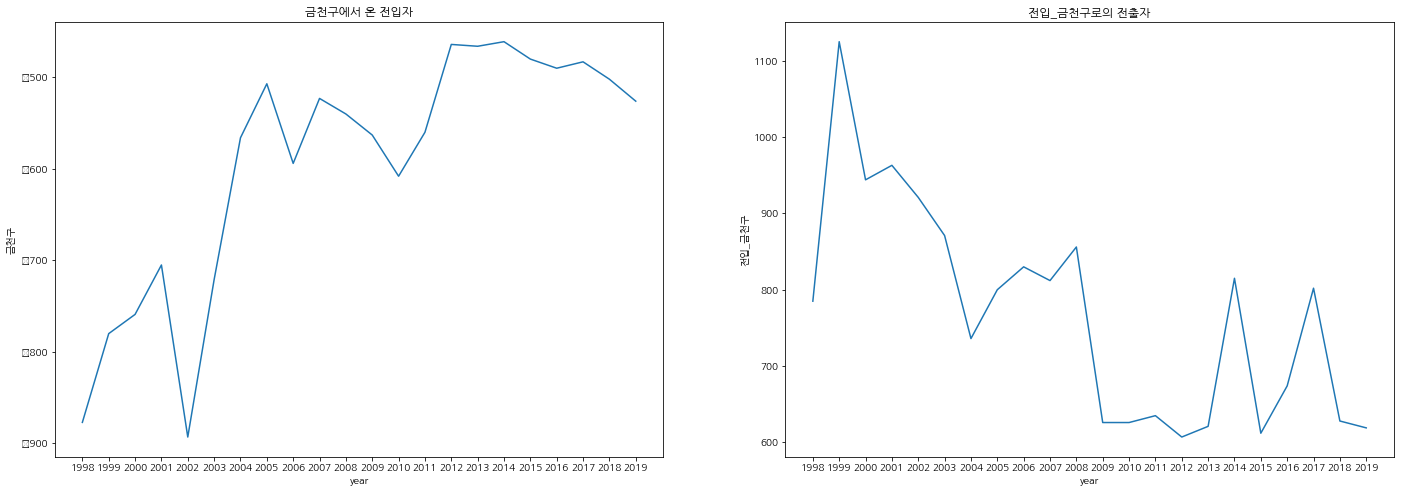

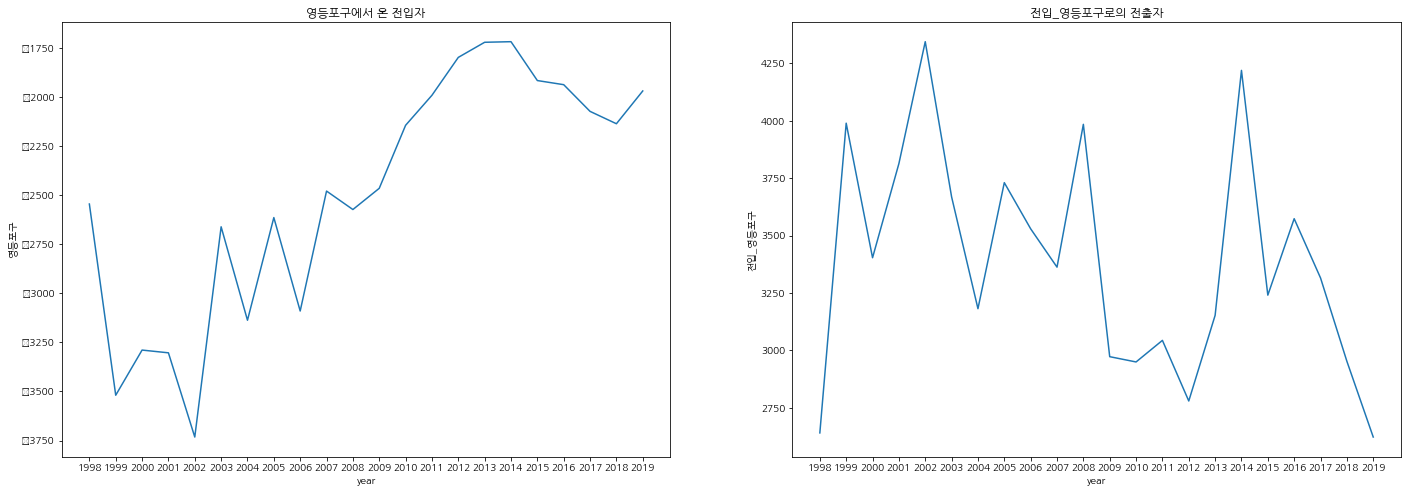

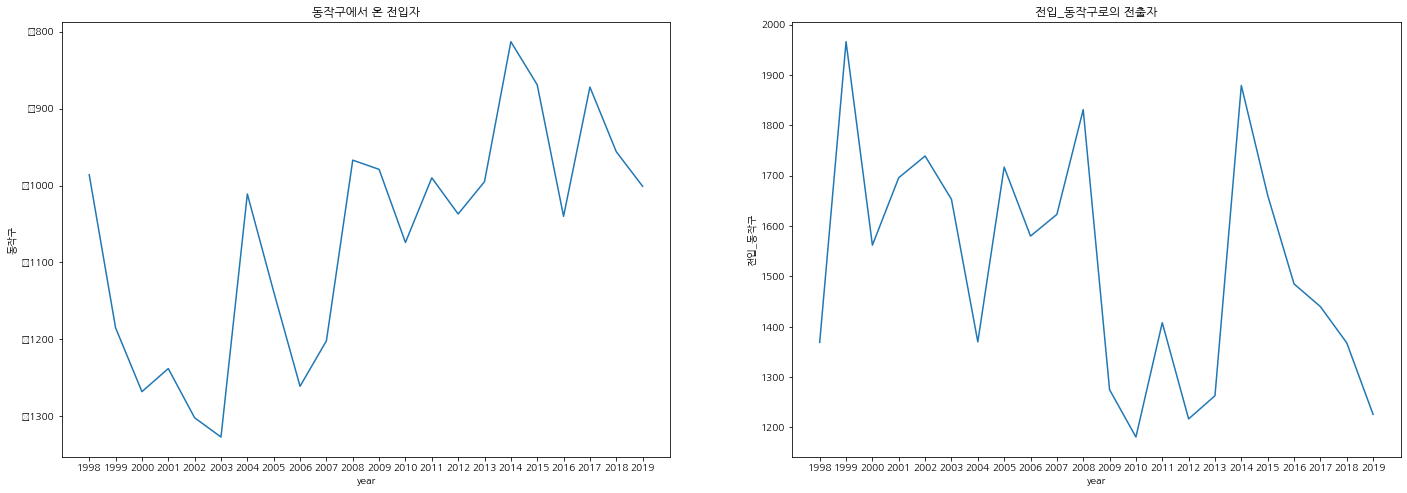

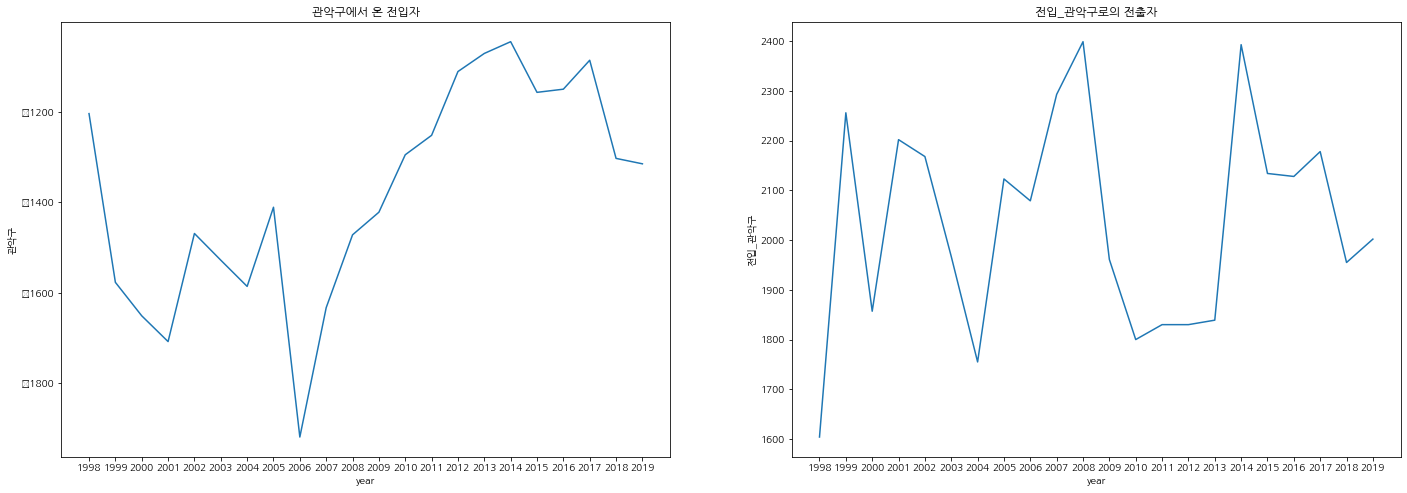

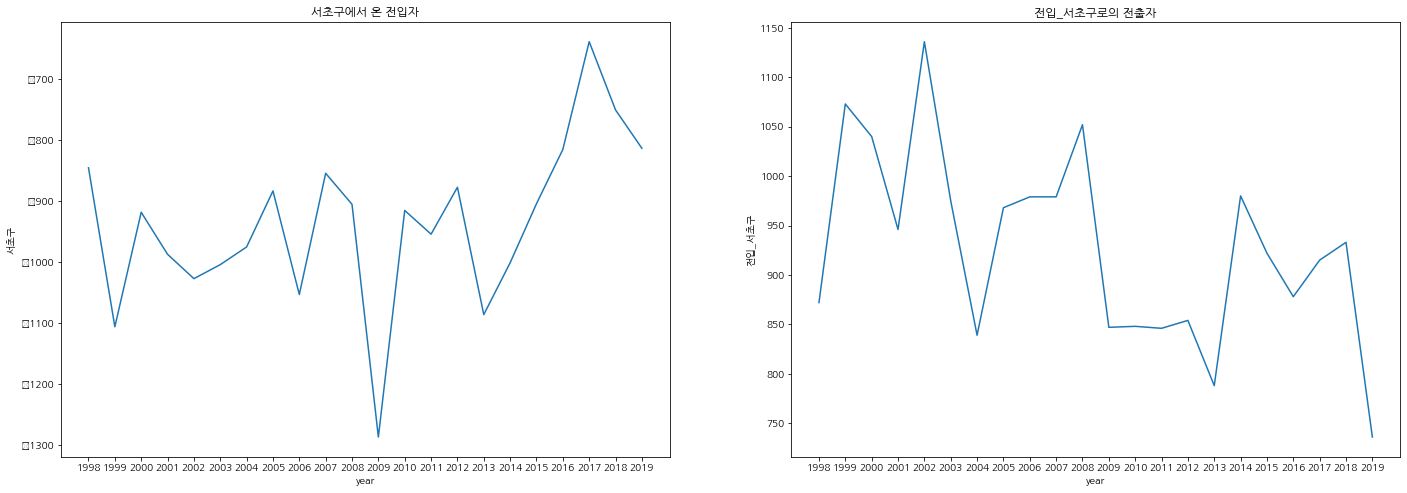

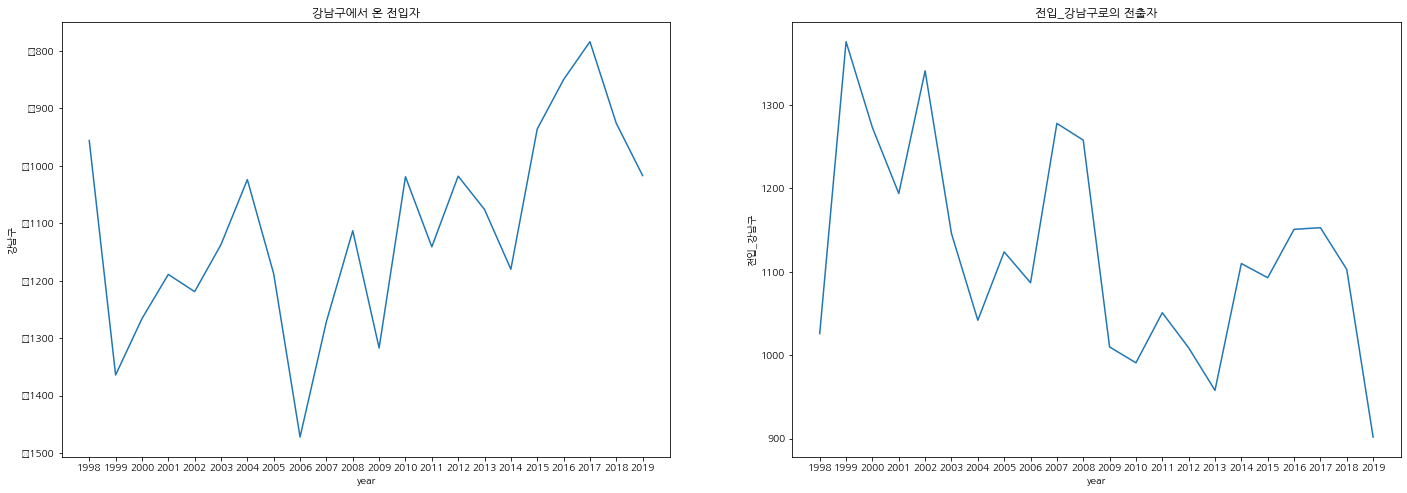

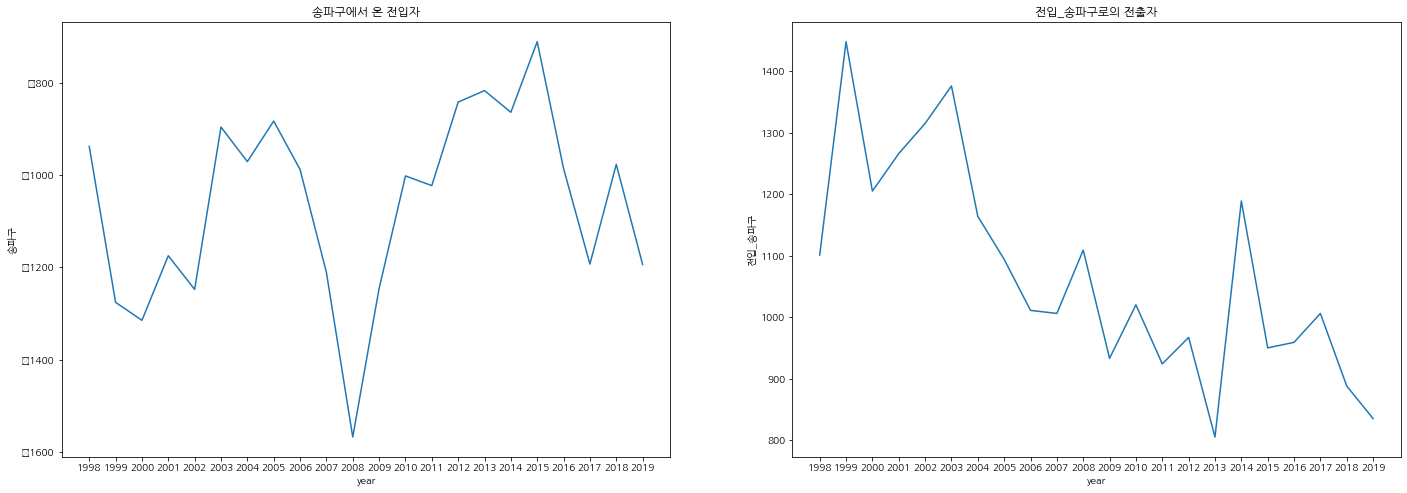

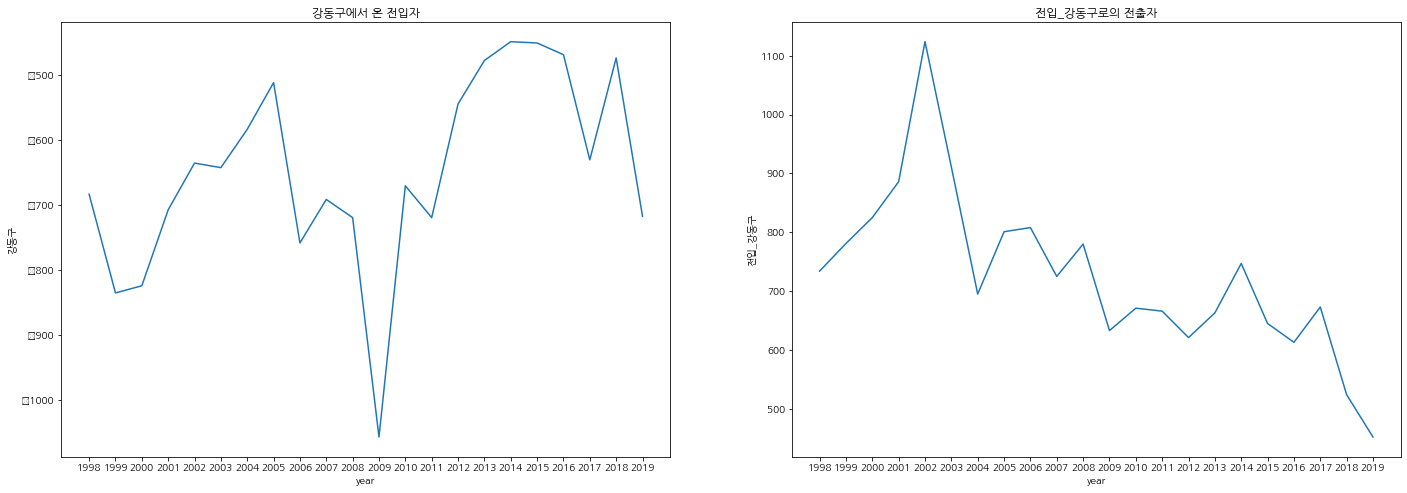

In [8]:
# for 문을 사용해서 전입자가 어떻게 변하는지 알아보자.
column = data.loc[:,'종로구':'강동구'].columns
전입_column = data.loc[:,'전입_종로구':].columns
print(column)
for i in range(len(column)):
  fig, ax = plt.subplots(ncols = 2, figsize = (24,8))
  sns.lineplot(data = data, x = 'year', y = column[i], ax = ax[0])
  sns.lineplot(data = data, x = 'year', y = 전입_column[i], ax = ax[1])
  ax[0].set_title(f'{column[i]}에서 온 전입자')
  ax[1].set_title(f'{전입_column[i]}로의 전출자')
  plt.show()

In [11]:
# 전입데이터와 전출데이터의 차이를 보여준다. (강동구를 기준으로!!)
for i in range(len(column)):
  difference= data[column[i]] + data[전입_column[i]]
  data[f'차이_{column[i]}'] = difference

In [12]:
data

,year,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전입_종로구,전입_중구,전입_용산구,전입_성동구,전입_광진구,전입_동대문구,전입_중랑구,전입_성북구,전입_강북구,전입_도봉구,전입_노원구,전입_은평구,전입_서대문구,전입_마포구,전입_양천구,전입_강서구,전입_구로구,전입_금천구,전입_영등포구,전입_동작구,전입_관악구,전입_서초구,전입_강남구,전입_송파구,전입_강동구,차이_종로구,차이_중구,차이_용산구,차이_성동구,차이_광진구,차이_동대문구,차이_중랑구,차이_성북구,차이_강북구,차이_도봉구,차이_노원구,차이_은평구,차이_서대문구,차이_마포구,차이_양천구,차이_강서구,차이_구로구,차이_금천구,차이_영등포구,차이_동작구,차이_관악구,차이_서초구,차이_강남구,차이_송파구,차이_강동구
2,1998,-431,-215,-673,-422,-610,-468,-477,-680,-349,-476,-881,-846,-1160,-1601,-8895,-26794,-1791,-877,-2545,-986,-1204,-845,-956,-938,-683,513,319,709,600,642,601,510,747,441,541,803,1205,1351,2235,9581,26794,1473,785,2641,1369,1604,872,1026,1101,734,82,104,36,178,32,133,33,67,92,65,-78,359,191,634,686,0,-318,-92,96,383,400,27,70,163,51
3,1999,-459,-383,-666,-845,-649,-535,-572,-758,-464,-491,-1215,-1071,-1331,-2158,-11921,-41832,-2916,-780,-3519,-1185,-1577,-1106,-1364,-1276,-835,554,351,846,706,915,783,740,959,636,629,1026,1455,1611,3099,14220,41832,2098,1125,3990,1966,2256,1073,1376,1448,781,95,-32,180,-139,266,248,168,201,172,138,-189,384,280,941,2299,0,-818,345,471,781,679,-33,12,172,-54
4,2000,-413,-433,-762,-608,-619,-588,-497,-605,-378,-480,-984,-1113,-1209,-2125,-12072,-37347,-2209,-759,-3289,-1268,-1651,-918,-1266,-1315,-824,540,337,844,697,795,698,625,789,497,506,889,1254,1415,2575,12612,37347,1808,944,3404,1562,1857,1040,1273,1205,825,127,-96,82,89,176,110,128,184,119,26,-95,141,206,450,540,0,-401,185,115,294,206,122,7,-110,1
5,2001,-348,-427,-821,-650,-589,-666,-525,-589,-413,-590,-1001,-1296,-1417,-1808,-13156,-45101,-2813,-705,-3303,-1238,-1708,-987,-1189,-1175,-707,489,449,985,883,832,759,677,758,525,519,814,1255,1519,3296,15775,45101,2172,963,3814,1696,2202,946,1194,1266,886,141,22,164,233,243,93,152,169,112,-71,-187,-41,102,1488,2619,0,-641,258,511,458,494,-41,5,91,179
6,2002,-394,-346,-617,-661,-608,-590,-423,-614,-566,-407,-856,-1100,-1325,-1959,-14167,-47864,-2146,-893,-3732,-1302,-1469,-1027,-1219,-1248,-635,510,631,1092,1019,993,816,768,898,584,563,976,1486,1631,3404,16170,47864,2463,921,4345,1739,2168,1136,1341,1315,1124,116,285,475,358,385,226,345,284,18,156,120,386,306,1445,2003,0,317,28,613,437,699,109,122,67,489
7,2003,-361,-291,-698,-591,-535,-609,-520,-804,-482,-457,-766,-1119,-1002,-2169,-11091,-41401,-2008,-721,-2661,-1327,-1528,-1004,-1137,-896,-642,438,436,1055,819,809,800,818,817,529,523,920,1261,1512,2670,13286,41401,2376,871,3669,1653,1967,975,1146,1376,911,77,145,357,228,274,191,298,13,47,66,154,142,510,501,2195,0,368,150,1008,326,439,-29,9,480,269
8,2004,-362,-268,-616,-553,-529,-449,-415,-520,-432,-386,-710,-1065,-1021,-2042,-10511,-37157,-1882,-566,-3137,-1011,-1586,-975,-1024,-971,-583,466,378,810,653,742,613,597,665,501,491,923,1118,1242,2493,11396,37157,2132,736,3182,1370,1755,839,1042,1164,695,104,110,194,100,213,164,182,145,69,105,213,53,221,451,885,0,250,170,45,359,169,-136,18,193,112
9,2005,-382,-259,-663,-563,-529,-504,-484,-874,-385,-370,-648,-979,-953,-2151,-10822,-39653,-1743,-507,-2614,-1138,-1411,-883,-1188,-883,-511,532,373,912,735,742,733,641,799,571,565,929,1523,1496,2798,12320,39653,2538,800,3731,1717,2123,968,1124,1094,801,150,114,249,172,213,229,157,-75,186,195,281,544,543,647,1498,0,795,293,1117,579,712,85,-64,211,290
10,2006,-472,-351,-828,-672,-660,-531,-534,-935,-579,-488,-736,-1151,-1199,-2190,-12684,-42079,-2543,-594,-3090,-1261,-1919,-1053,-1472,-988,-758,408,377,926,740,753,687,626,859,597,553,866,1312,1281,2677,13981,42079,2403,830,3530,1580,2079,979,1087,1011,808,-64,26,98,68,93,156,92,-76,18,65,130,161,82,487,1297,0,-140,236,440,319,160,-74,-385,23,50
11,2007,-447,-392,-762,-640,-655,-619,-539,-826,-424,-421,-809,-1064,-1080,-2209,-10947,-39545,-1927,-523,-2479,-1202,-1633,-854,-1271,-1211,-691,489,403,864,713,768,773,654,953,635,539,1000,1455,1358,2767,12076,39545,2294,812,3363,1623,2293,979,1278,1006,725,42,11,102,73,113,154,115,127,211,118,191,391,278,558,1129,0,367,289,884,421,660,125,7,-205,34


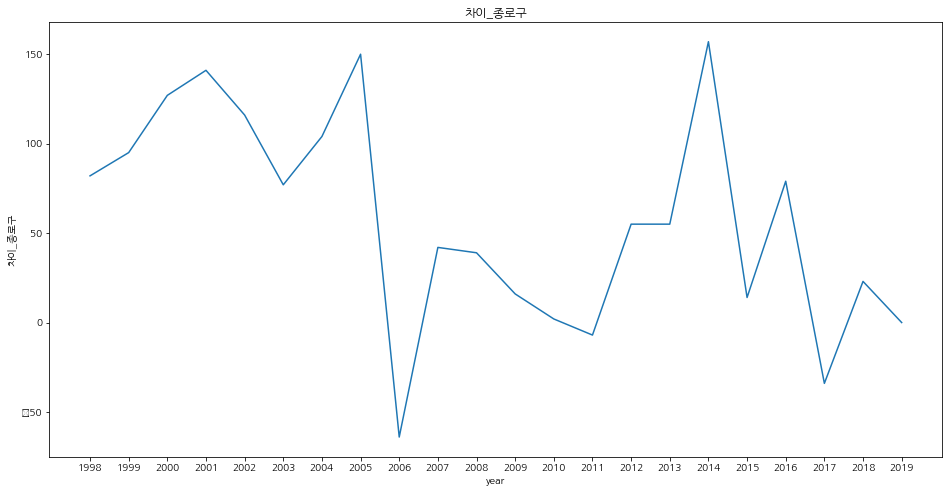

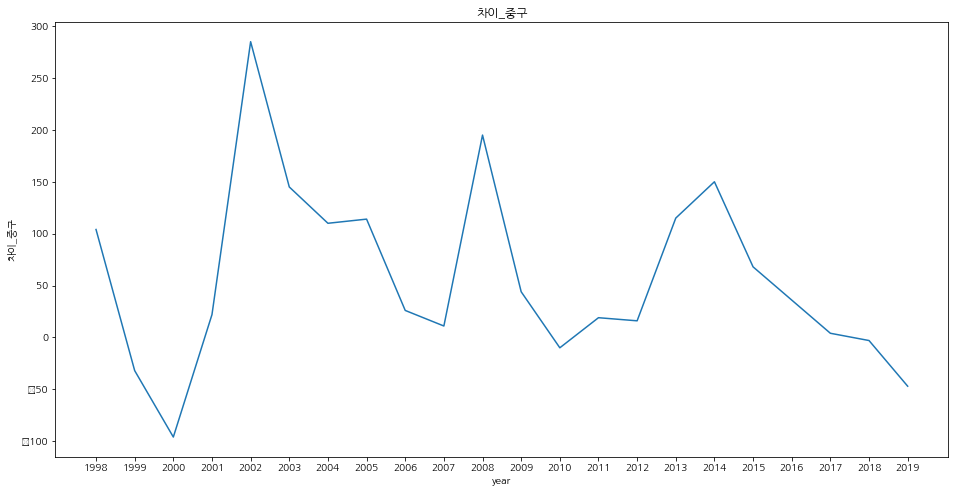

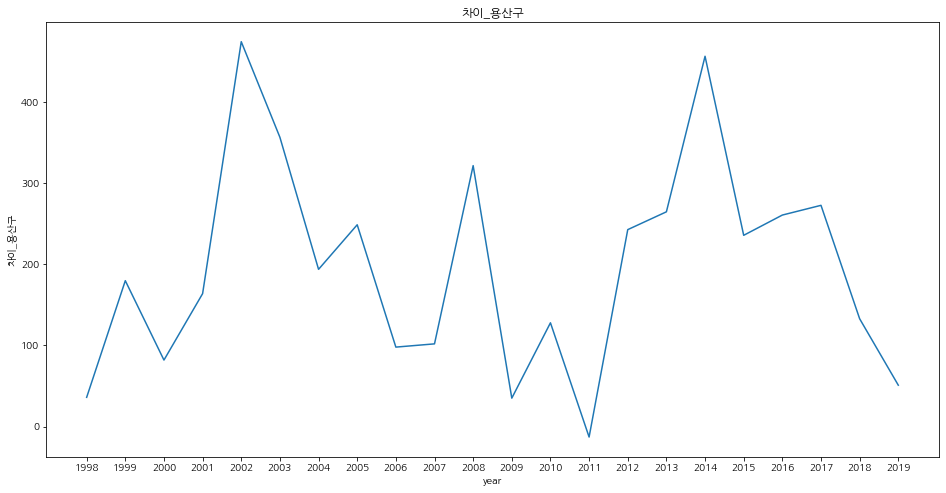

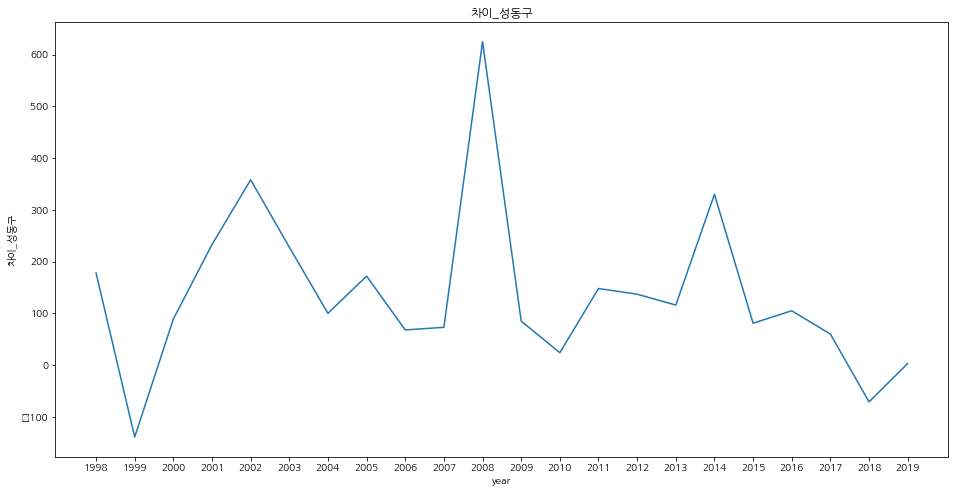

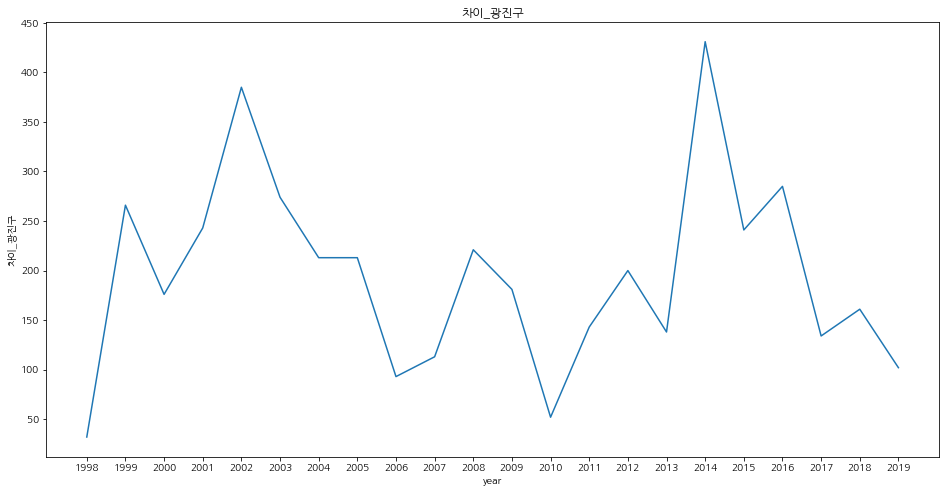

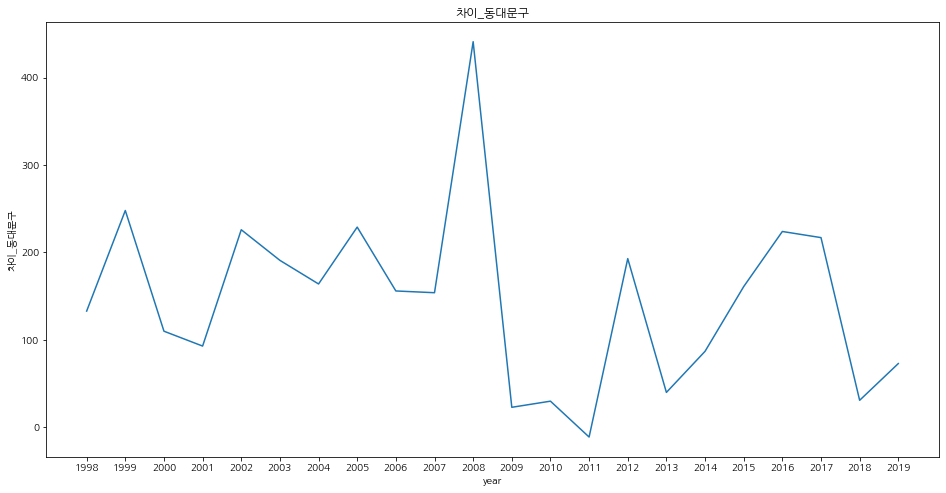

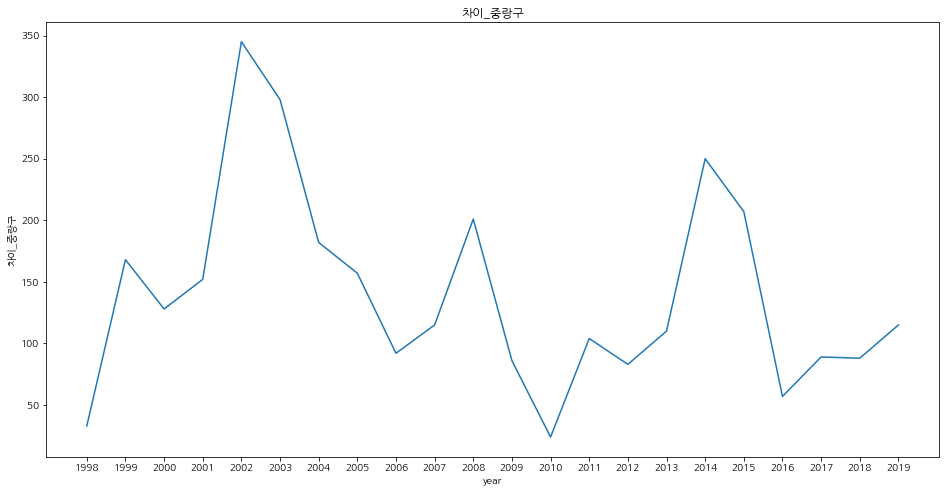

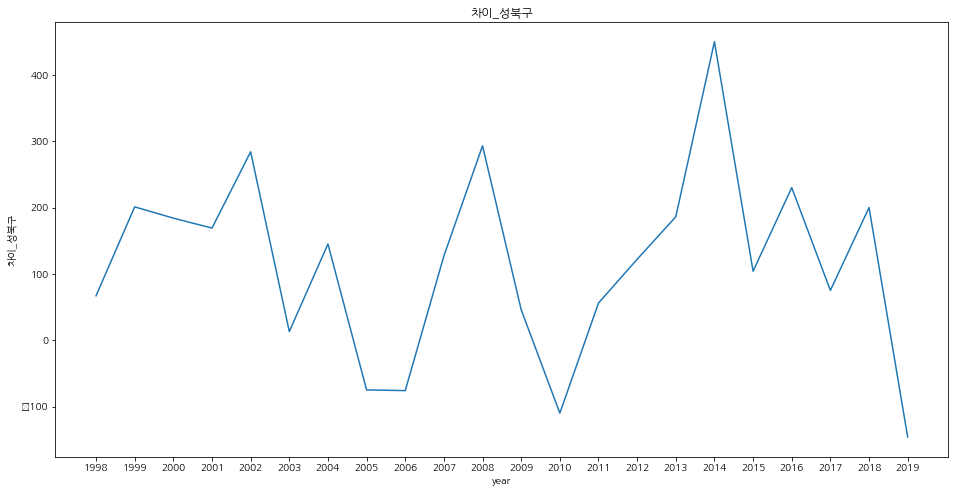

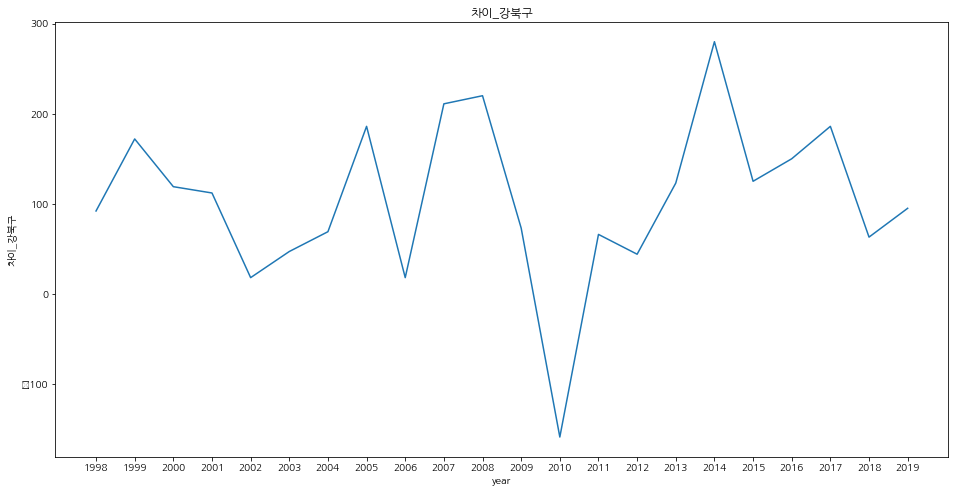

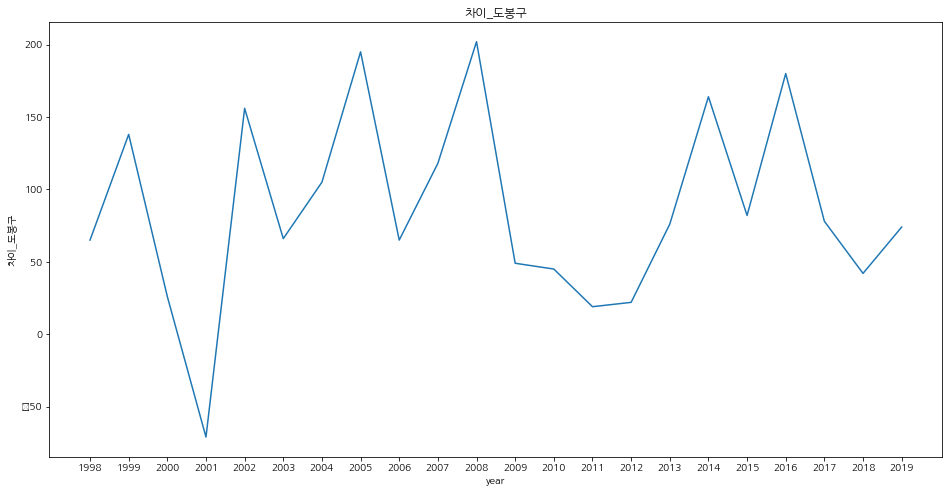

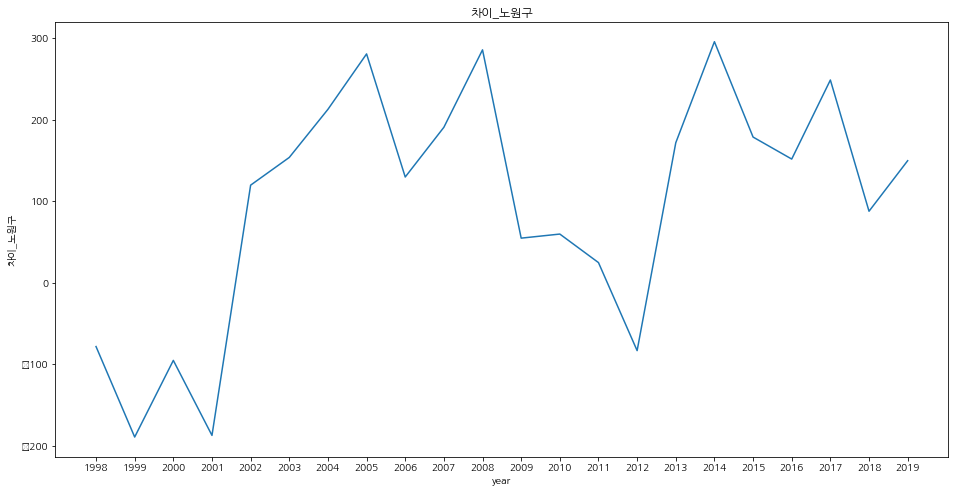

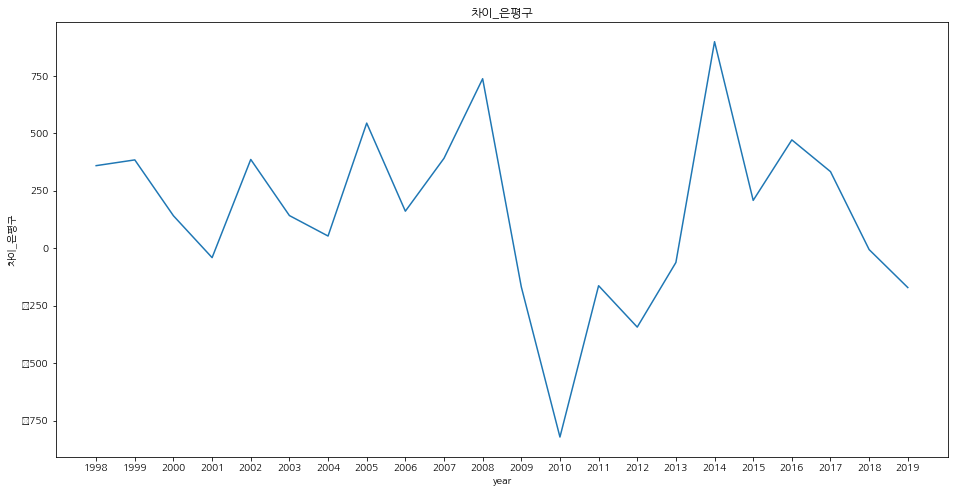

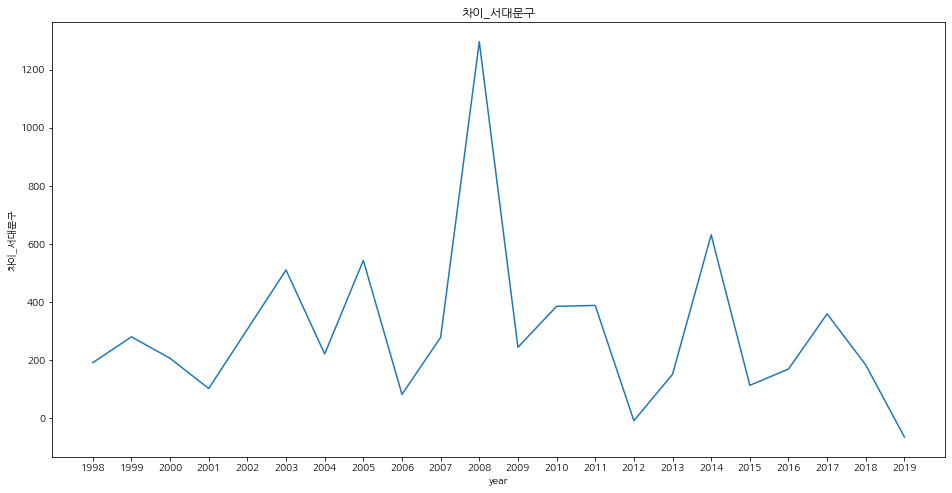

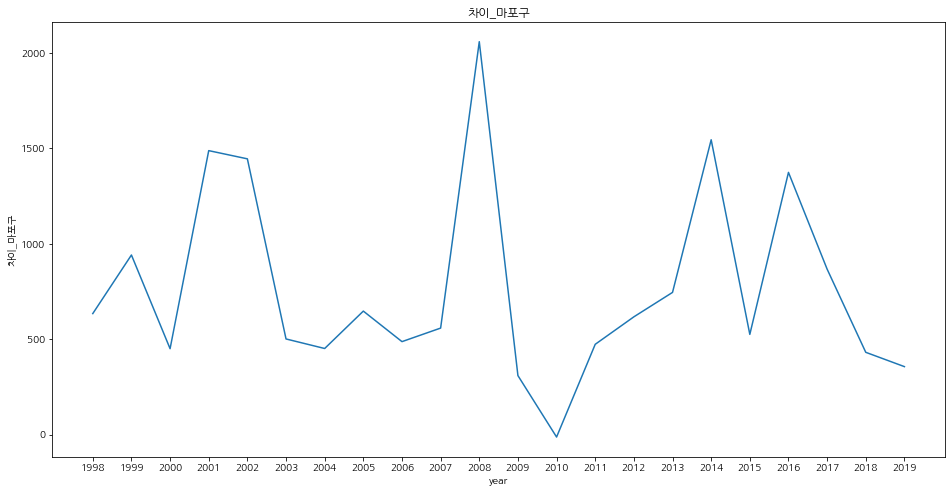

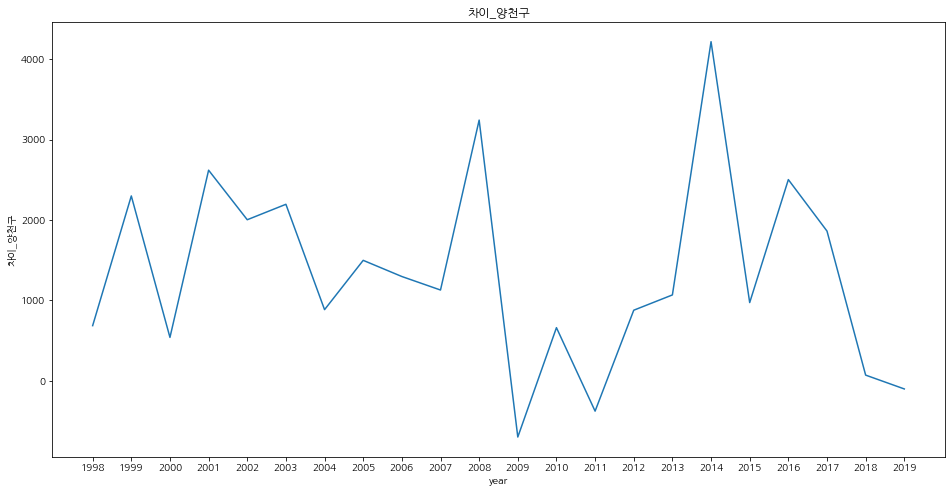

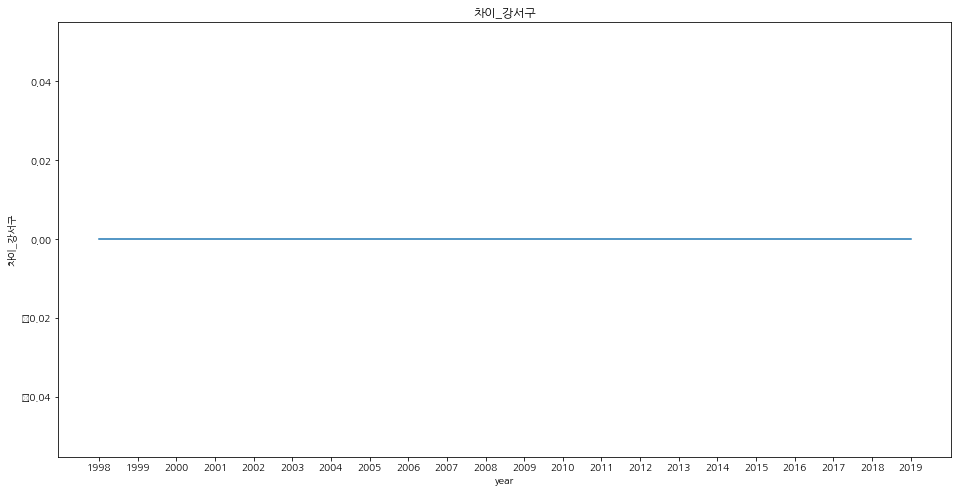

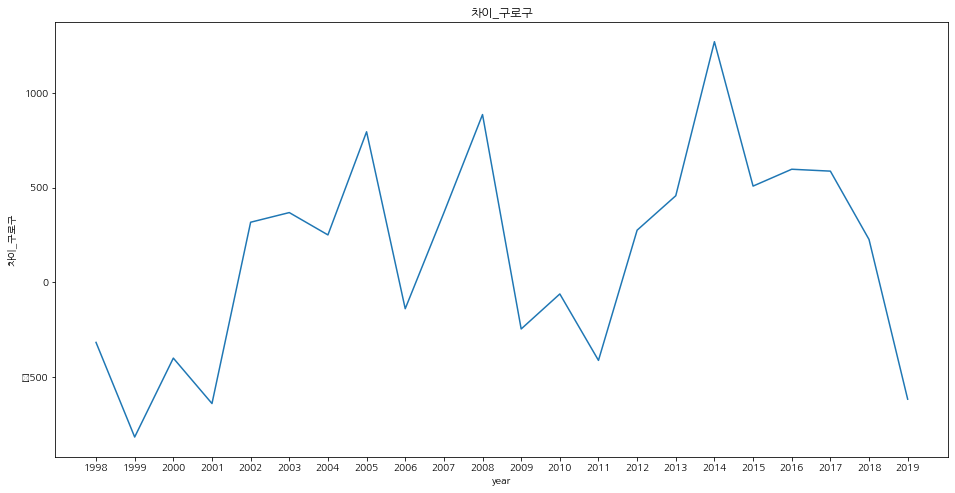

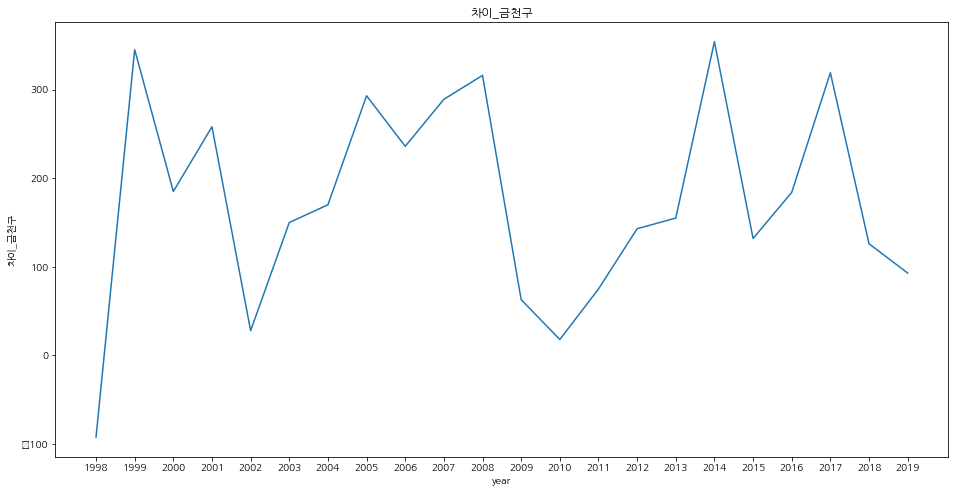

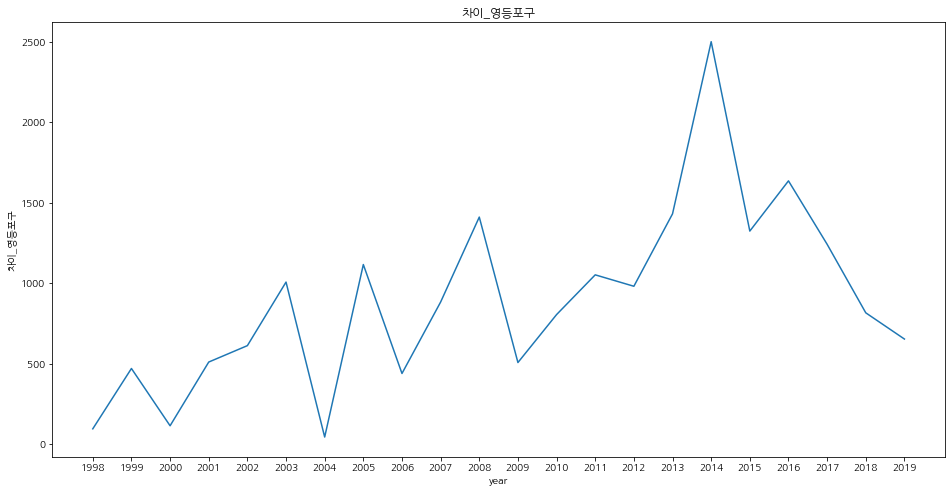

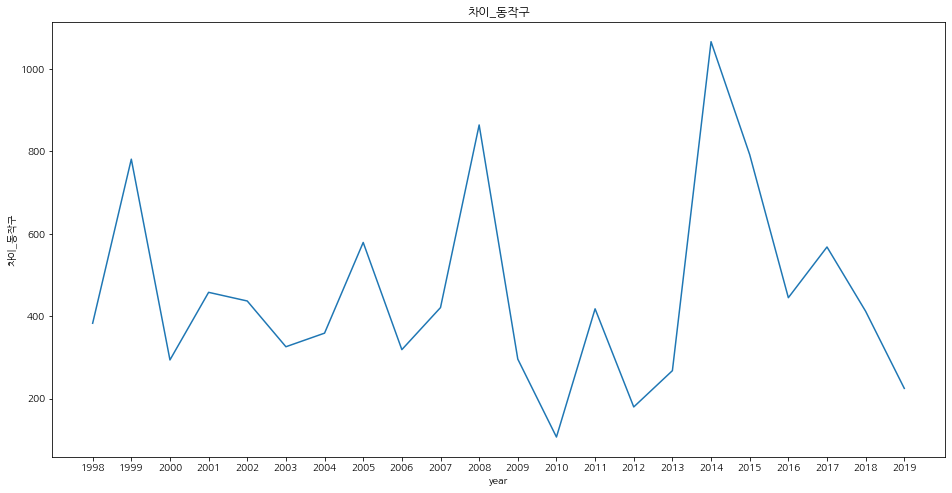

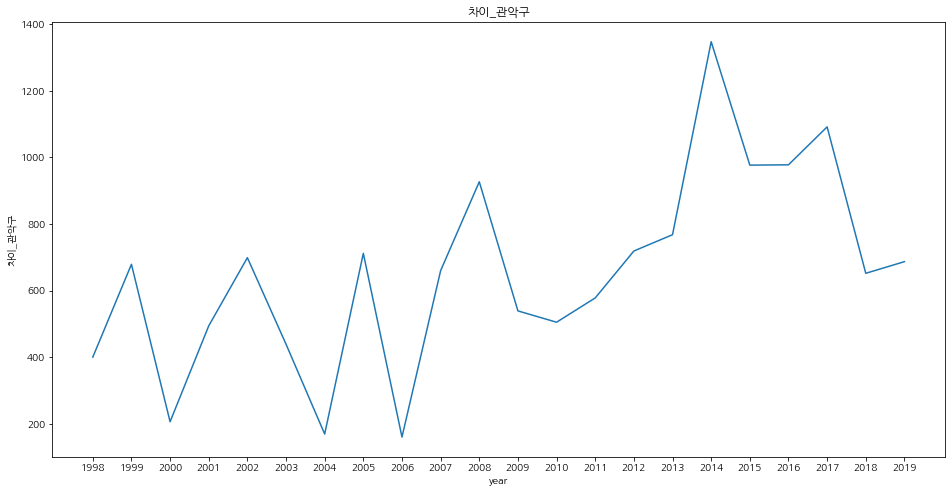

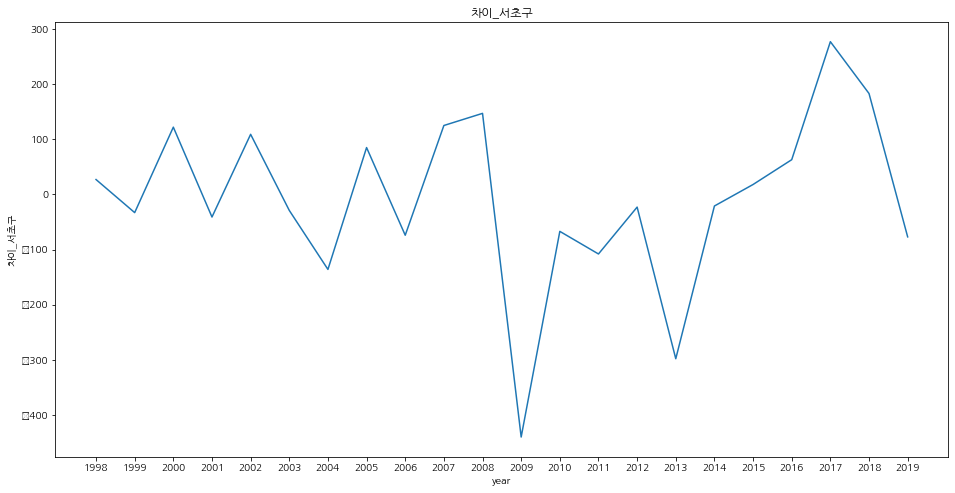

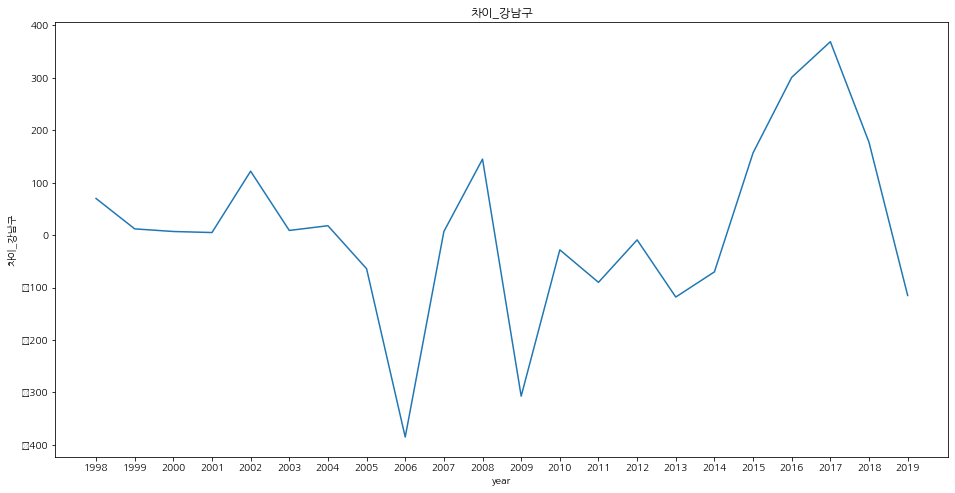

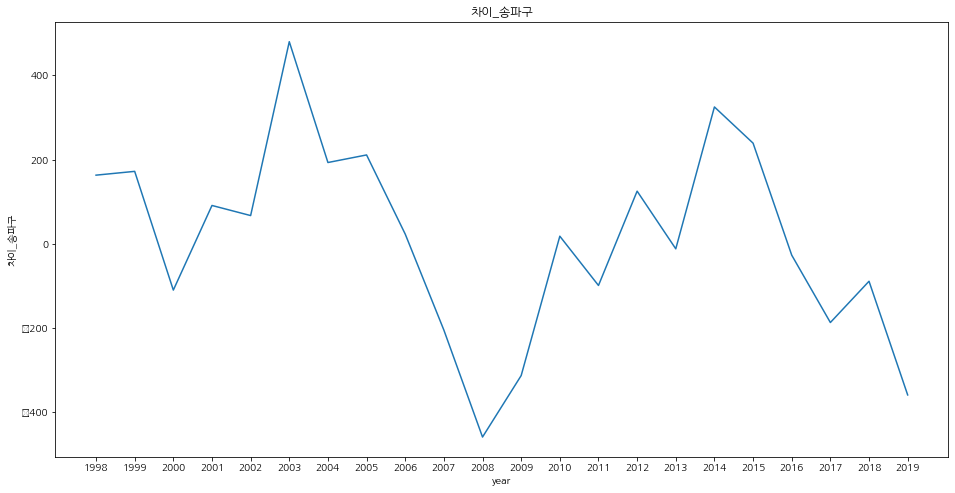

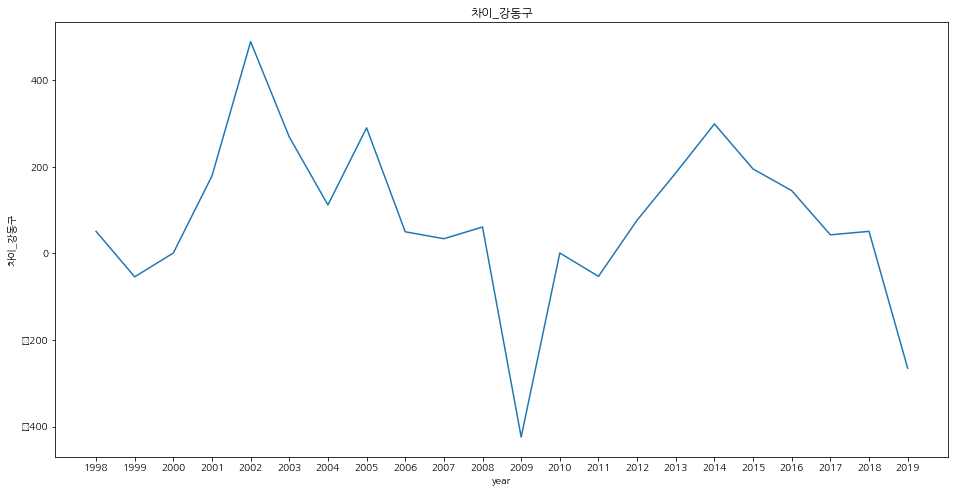

In [15]:
# 강서구를 기준으로 차이를 그래프로 나타내 보자.
column = data.loc[:,'차이_종로구':].columns
for i in column:
  plt.figure(figsize = (16,8))
  sns.lineplot(data = data, x = 'year', y = i)
  plt.title(f'{i}')
  plt.show()

# 용산구, 광진구, 동대문구, 중랑구, 서대문구, 마포구, 영등포구, 동작구, 관악구의 데이터는 1998~2019년까지 강서구로 계속 유입되고 있다.
# 다른 데이터들은 들쭉날쭉한 것을 확인했다.

In [13]:
# # target변수 만들기
# url = f"http://openapi.seoul.go.kr:8088/{KEY}/xml/landActualPriceInfo/{START_INDEX}/{END_INDEX}/"
# request = urllib.request.Request(url)
# response_body = urlopen(request, timeout=60).read() # get bytes data
# json_str = response_body.decode('utf-8')
# xml_parse = xmltodict.parse(decode_data)     # string인 xml 파싱
# json_object = json.loads(json.dumps(xml_parse))
# locals()[f'cnt_{START_INDEX}_{END_INDEX}'] = pd.json_normalize(json_object['landActualPriceInfo']['row'])

NameError: ignored

In [ ]:
# Linear Regression을 이용해서 rmse를 찍어보고
# target변수를 가지고 다른 변수들의 eda를 해보는 것이 좋을 것 같다.
# 그리고 변수가 어떻게 LinearRegression이 되는지 확인하기 위해서 stats.model을 이용해서 변수들이 모델에서 어떻게 작동하는지 확인해보자.